In [2]:
import pandas as pd
import numpy as np

In [1]:
path="C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/1)Linear Regression/Assignment Given/Salary_Data.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Define Target & Independent Variable

In [7]:
y=df["Salary"]

In [8]:
X=df["YearsExperience"]

In [21]:
# As we have less number of data. We will not split the data into Train & Test Dataset

In [9]:
import seaborn as sns 

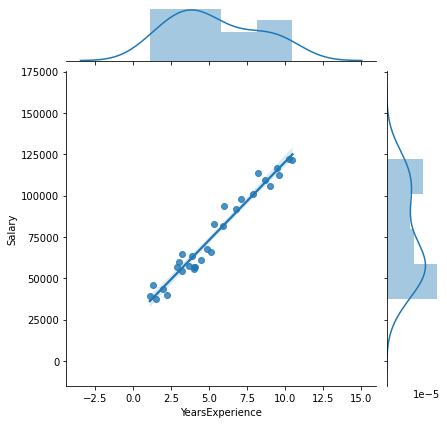

In [12]:
sns.jointplot(X,y, kind="reg" )

In [ ]:
# Lets use Statsmodel as well as Sklearn package to determine the Regression values

### Statsmodels

In [13]:
import statsmodels.api as sm


In [14]:
constant=sm.add_constant(X)

In [15]:
lm_sm=sm.OLS(y,constant).fit()

In [16]:
lm_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.14e-20
Time:                        23:05:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets convert X into LogX 

In [21]:
lm_sm_log=sm.OLS(y,np.log(X)).fit()

In [22]:
lm_sm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                    8.06e-26
Time:                        23:06:48   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sklearn

In [27]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_sk=LinearRegression(normalize=True)

In [25]:
X_2d=df[["YearsExperience"]]

In [28]:
lr_sk.fit(X_2d,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
print(lr_sk.intercept_, lr_sk.coef_)

25792.20019866868 [9449.96232146]


In [31]:
pd.DataFrame(lr_sk.predict(X_2d), y)

,0
Salary,
39343.0,36187.158752
46205.0,38077.151217
37731.0,39967.143681
43525.0,44692.124842
39891.0,46582.117306
56642.0,53197.090931
60150.0,54142.087163
54445.0,56032.079627
64445.0,56032.079627
